### 📱 Mobile Phone Price Classification Project
    The aim of this project is to classify the prices of Mobile phones and provide the Price range of a mobile Phone using Classification techniques.

### 1. Problem Definition
To predict the price range of Prices of mobile phones based on the features of the phone.

### 2. Data
The data was sourced from Kaggle: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification. A data dictionary is attached in the file.

### 3. Evaluation
    The evaluation metric on this project is the accuracy of the model's predictions.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Import the data
df_train = pd.read_csv("train.csv")
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0,...,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


In [4]:
df_train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [32]:
df_train.clock_speed.value_counts()

clock_speed
0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: count, dtype: int64

In [8]:
df_train.three_g.value_counts()

three_g
1    1523
0     477
Name: count, dtype: int64

In [9]:
df_train.battery_power

0        842
1       1021
2        563
3        615
4       1821
        ... 
1995     794
1996    1965
1997    1911
1998    1512
1999     510
Name: battery_power, Length: 2000, dtype: int64

In [10]:
df_train.int_memory

0        7
1       53
2       41
3       10
4       44
        ..
1995     2
1996    39
1997    36
1998    46
1999    45
Name: int_memory, Length: 2000, dtype: int64

In [14]:
df_train.ram

0       2549
1       2631
2       2603
3       2769
4       1411
        ... 
1995     668
1996    2032
1997    3057
1998     869
1999    3919
Name: ram, Length: 2000, dtype: int64

In [28]:
df_train.ram.value_counts()

ram
1464    4
3142    4
2610    4
2227    4
1229    4
       ..
2312    1
2167    1
3508    1
297     1
3919    1
Name: count, Length: 1562, dtype: int64

In [26]:
df_train.price_range

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [27]:
df_train.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [30]:
df_train.dual_sim.value_counts()

dual_sim
1    1019
0     981
Name: count, dtype: int64

In [42]:
df_train.talk_time

0       19
1        7
2        9
3       11
4       15
        ..
1995    19
1996    16
1997     5
1998    19
1999     2
Name: talk_time, Length: 2000, dtype: int64

### 4. Exploratory Data Analysis
using charts and graphs to draw insight from data.

In [11]:
plt.style.use("ggplot")

In [73]:
def Plot_bar(df, feature, target="price_range", color="tomato"):
    """Plots the prescence of a binary Feature against the target(Price range)"""
    avg_prescence = df.groupby(target)[feature].mean()
    plt.figure(figsize=(8, 5))
    avg_prescence.plot(kind="bar", color=color, edgecolor="black")
    plt.title(f"Prescence of {feature.replace("_", " ").title()} By {target.replace("_", " ").title()}")
    plt.xlabel(f"{target.replace("_", " ").title()}")
    plt.ylabel(f"Average Prescence of {feature.replace("_", " ").title()}")
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

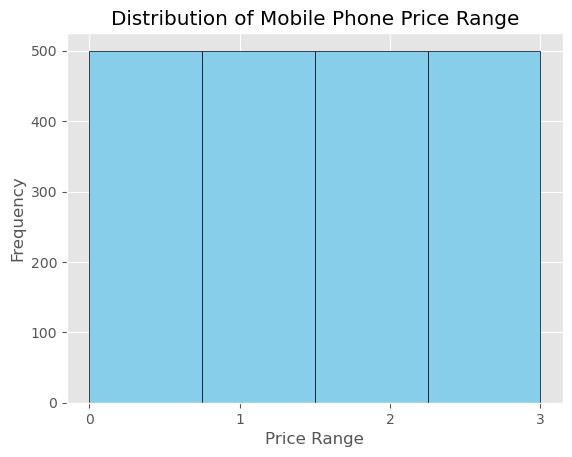

In [35]:
# Frequency distribution of the Price ranges
fig, ax = plt.subplots()
ax.hist(df_train["price_range"], color="skyblue", edgecolor="black", bins=4)
ax.set(title="Distribution of Mobile Phone Price Range",
      xlabel="Price Range",
      ylabel="Frequency",
      xticks=[0, 1 ,2, 3]);

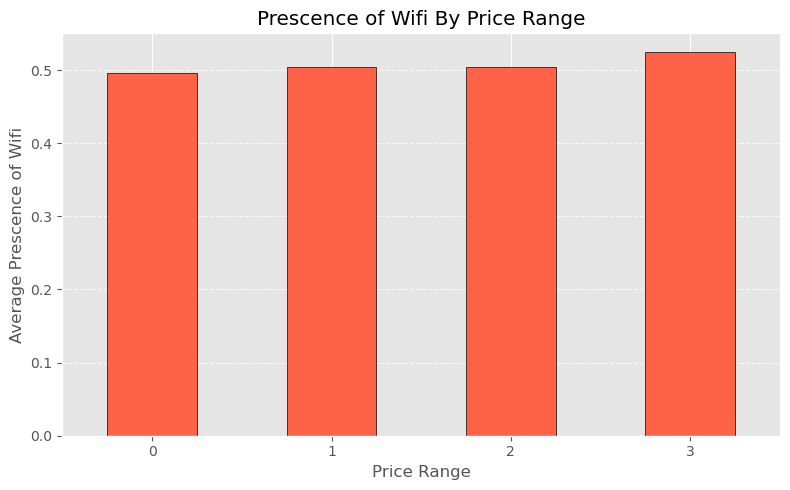

In [78]:
Plot_bar(df_train, "wifi")

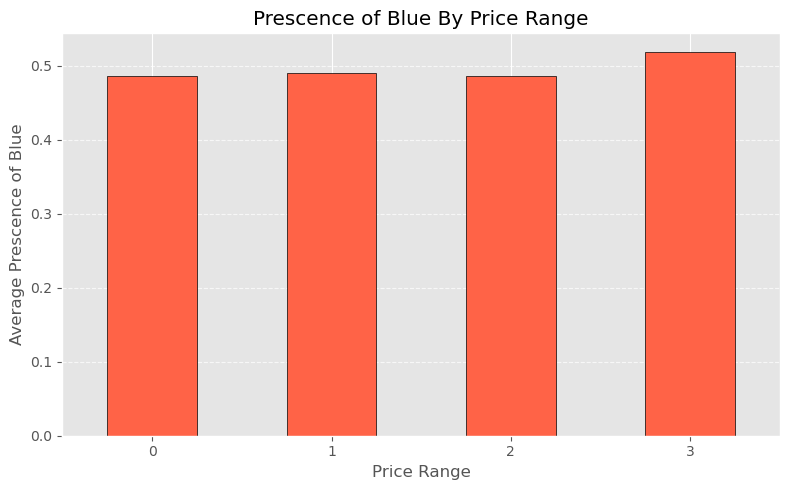

In [75]:
Plot_bar(df_train, "blue")

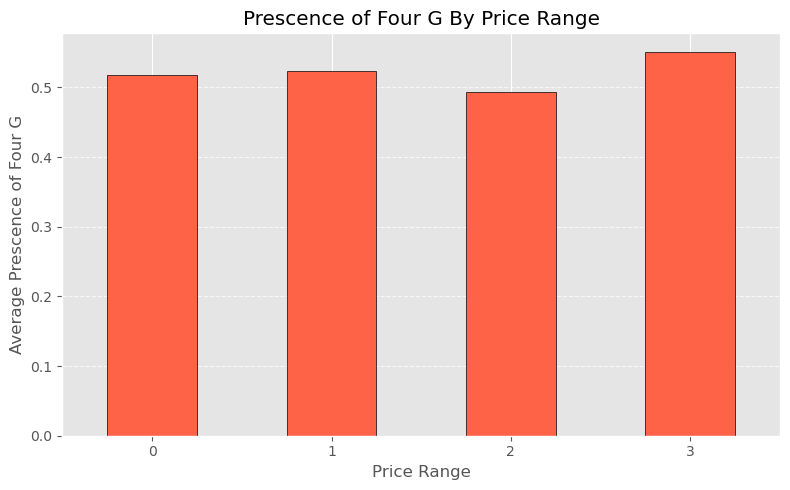

In [76]:
Plot_bar(df_train, "four_g")

C:\Users\user\AppData\Local\Temp\ipykernel_15240\3432389816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='int_memory', data=df_train, palette='Blues')


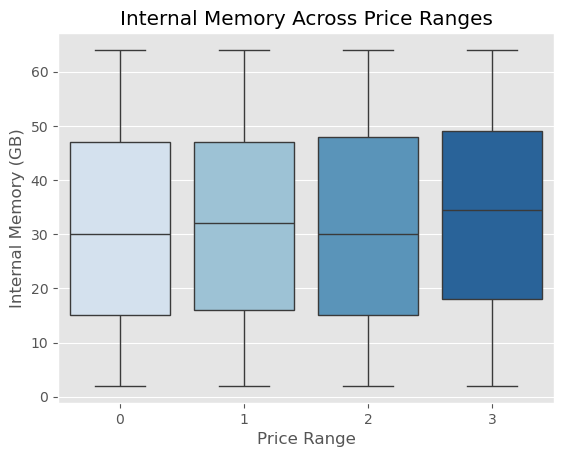

In [43]:
sns.boxplot(x='price_range', y='int_memory', data=df_train, palette='Blues')
plt.title('Internal Memory Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Internal Memory (GB)')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15240\1174329588.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='price_range', y='battery_power', data=df_train, palette='coolwarm')


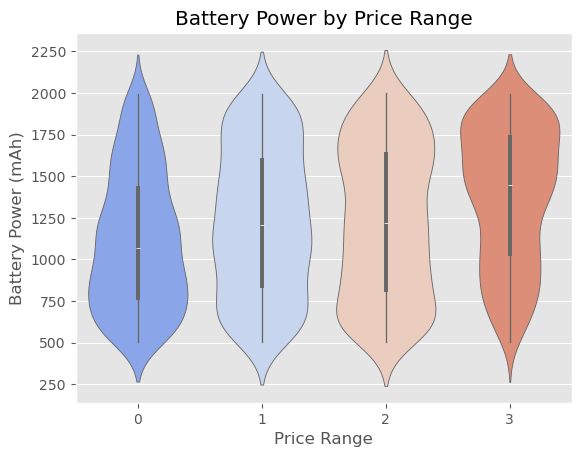

In [40]:
sns.violinplot(x='price_range', y='battery_power', data=df_train, palette='coolwarm')
plt.title('Battery Power by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Battery Power (mAh)')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15240\3063410061.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=df_train, palette='pastel')


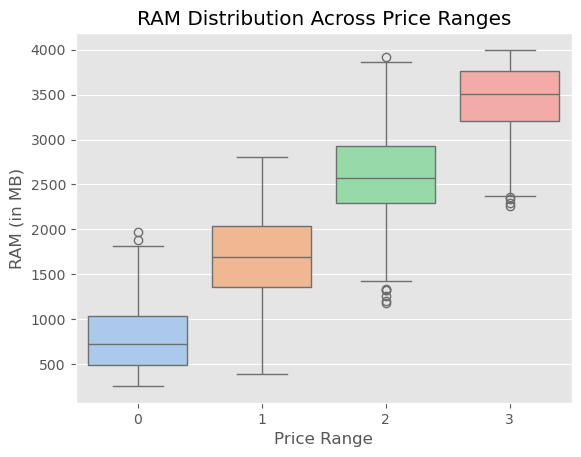

In [44]:
sns.boxplot(x='price_range', y='ram', data=df_train, palette='pastel')
plt.title('RAM Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('RAM (in MB)')
plt.show()

In [37]:
import matplotlib.pyplot as plt
def avg_bar_plot(df, feature, target="price_range", Color="steelblue"):
    """Plots a bar chart of the average feature grouped by target"""
    avg_values = df.groupby(target)[feature].mean()

    plt.figure(figsize=(8, 5))
    avg_values.plot(kind="bar", color=Color, edgecolor="black")
    plt.title(f"Average {feature.replace("_", " ").title()} By {target.replace("_", " ").title()}")
    plt.xlabel(f"{target.replace("_", " ").title()}")
    plt.ylabel(f"{feature.replace("_", " ").title()}")
    plt.xticks(rotation=0)
    plt.grid(axis="y", linestyle="--")
    plt.show()
    

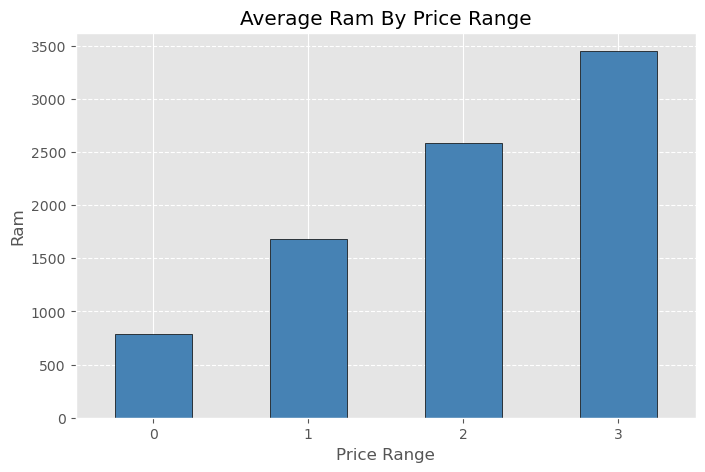

In [60]:
avg_bar_plot(df_train, "ram")

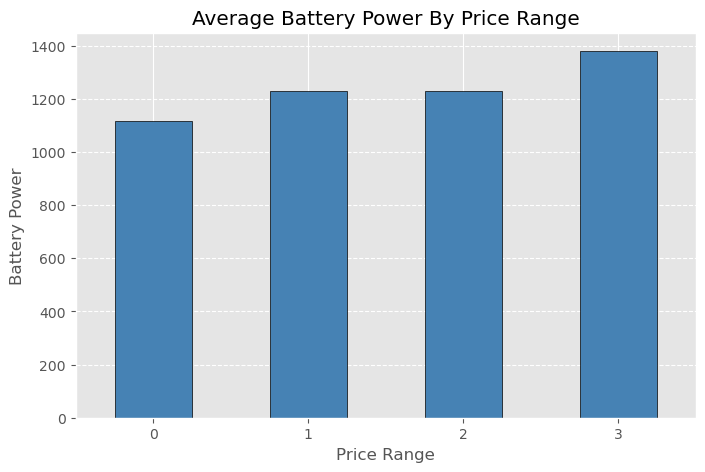

In [61]:
avg_bar_plot(df_train, "battery_power")

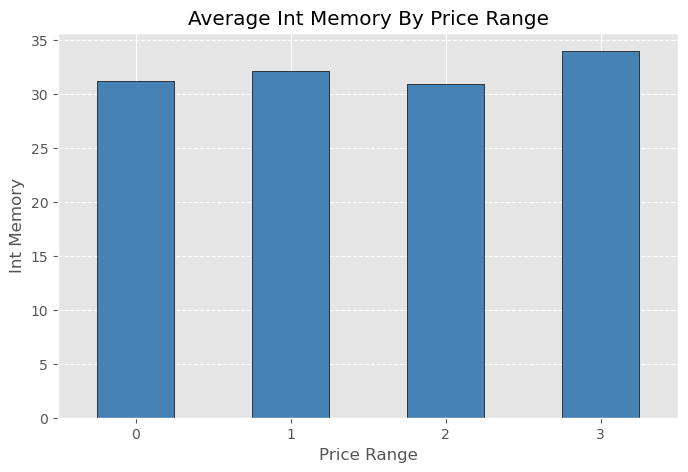

In [62]:
avg_bar_plot(df_train, "int_memory")

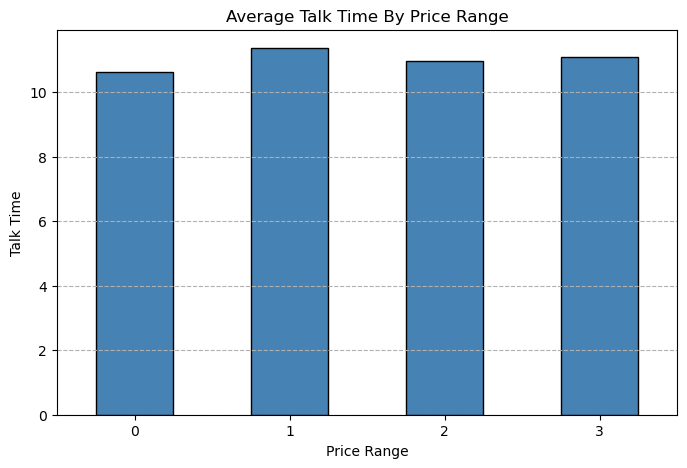

In [38]:
avg_bar_plot(df_train, "talk_time")

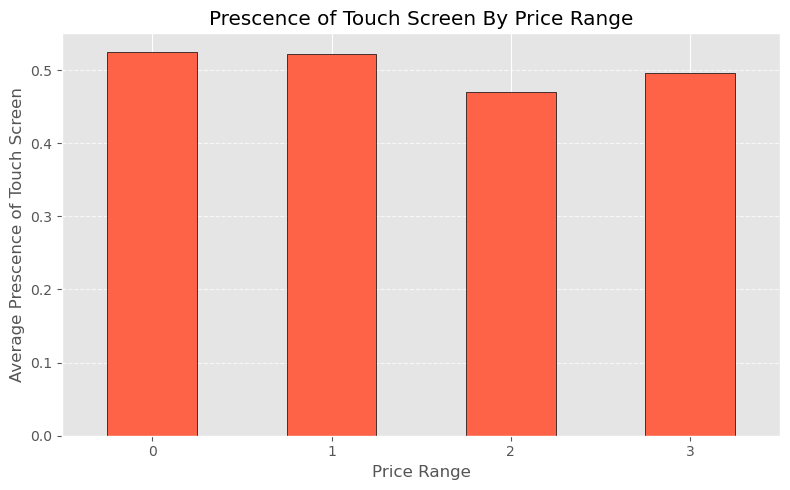

In [77]:
Plot_bar(df_train, "touch_screen")

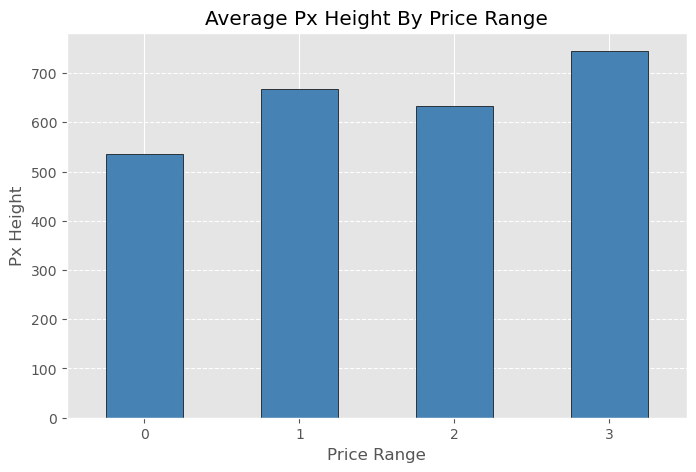

In [79]:
# Plot Pixel Height against Price Range
avg_bar_plot(df_train, "px_height")

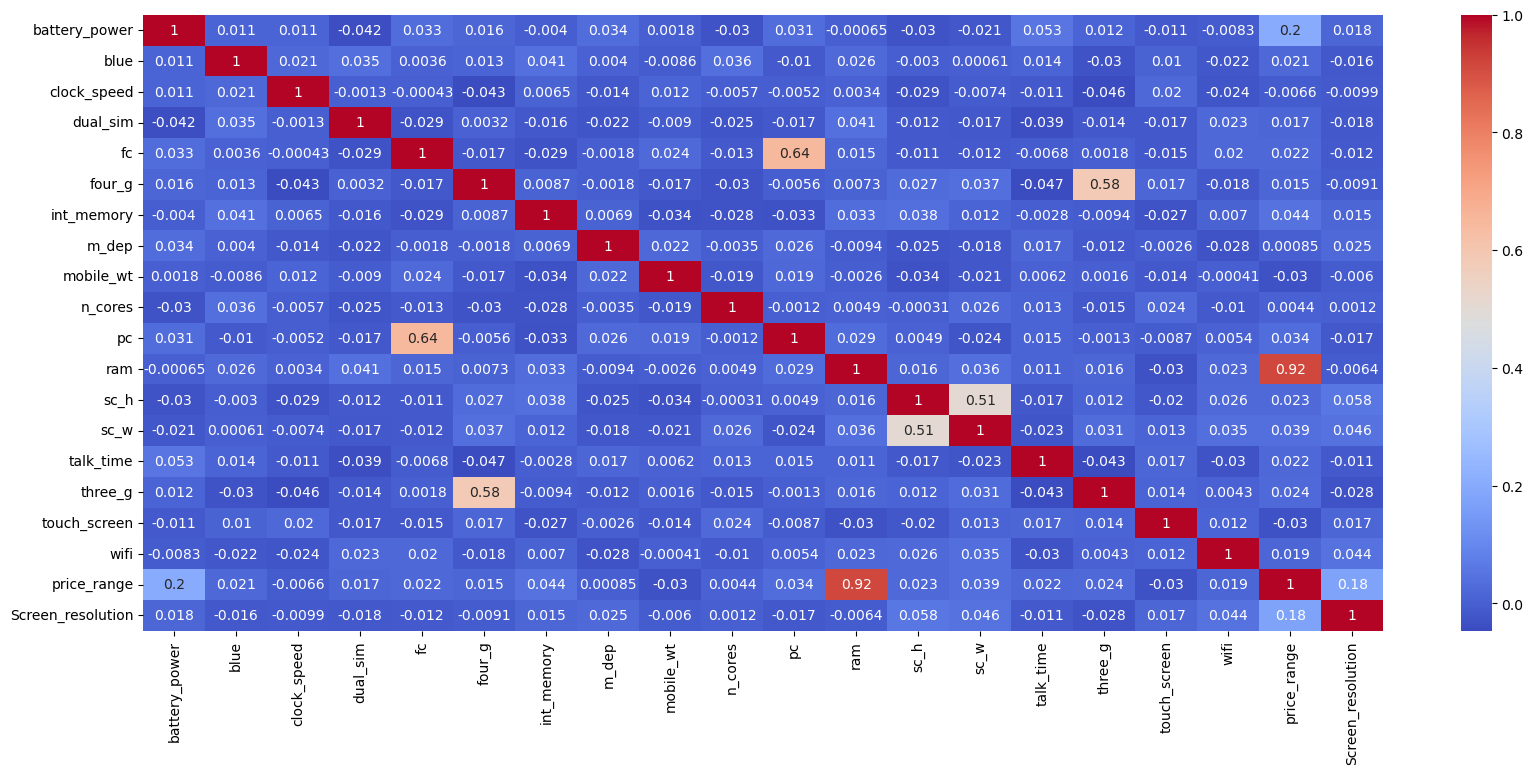

In [65]:
# compute Correlation Matrix
corr_matrix = df_train.corr()

# Visualize with a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [3]:
# pixel height and pixel width can be multiplied and put in a column "Screen resolution"
df_train["Screen_resolution"] = df_train["px_height"] * df_train["px_width"]

In [4]:
df_train.drop(["px_height", "px_width"], axis=1, inplace=True)

In [70]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0,...,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


In [5]:
# Check for non-numericl values
for label, content in df_train.items():
    if pd.api.types.is_string_dtype(content) or pd.api.types.is_object_dtype(content):
        print(label)

In [6]:
# Perform feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
# Select features to scale
features = ["ram", "battery_power", "int_memory", "Screen_resolution"]
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform selected columns
df_train_scaled = df_train.copy()
df_train_scaled[features] = scaler.fit_transform(df_train[features])
# View the scaled data
print(df_train_scaled.head())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0      -0.902597     0          2.2         0   1       0   -1.380644    0.6   
1      -0.495139     1          0.5         1   0       1    1.155024    0.7   
2      -1.537686     1          0.5         1   2       1    0.493546    0.9   
3      -1.419319     1          2.5         0   0       0   -1.215274    0.8   
4       1.325906     1          1.2         0  13       1    0.658915    0.6   

   mobile_wt  n_cores  pc       ram  sc_h  sc_w  talk_time  three_g  \
0        188        2   2  0.391703     9     7         19        0   
1        136        3   6  0.467317    17     3          7        1   
2        145        5   6  0.441498    11     2          9        1   
3        131        6   9  0.594569    16     8         11        1   
4        141        2  14 -0.657666     8     2         15        1   

   touch_screen  wifi  price_range  Screen_resolution  
0             0     1            1  

there are no missing and non-numerical data

## Model Driven Analysis
For this model-driven analysis, I would be using the following models:
* Support Vector Machines(SVM's)
* K-Nearest Neighbours
* Random Forest Classifier
* Naive Bayes

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [8]:
X_train = df_train_scaled.drop("price_range", axis=1)
Y_train = df_train["price_range"]

In [9]:
df_test = pd.read_csv("test.csv")
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
id,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,991.0,992.0,993.0,994.0,995.0,996.0,997.0,998.0,999.0,1000.0
battery_power,1043.0,841.0,1807.0,1546.0,1434.0,1464.0,1718.0,833.0,1111.0,1520.0,...,1807.0,1797.0,1895.0,567.0,936.0,1700.0,609.0,1185.0,1533.0,1270.0
blue,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
clock_speed,1.8,0.5,2.8,0.5,1.4,2.9,2.4,2.4,2.9,0.5,...,1.2,2.6,0.5,2.7,1.4,1.9,1.8,1.4,0.5,0.5
dual_sim,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
fc,14.0,4.0,1.0,18.0,11.0,5.0,1.0,0.0,9.0,1.0,...,4.0,4.0,0.0,14.0,0.0,0.0,0.0,1.0,0.0,4.0
four_g,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
int_memory,5.0,61.0,27.0,25.0,49.0,50.0,47.0,62.0,25.0,25.0,...,37.0,42.0,62.0,56.0,46.0,54.0,13.0,8.0,50.0,35.0
m_dep,0.1,0.8,0.9,0.5,0.5,0.8,1.0,0.8,0.6,0.5,...,0.8,0.6,0.9,0.4,0.8,0.5,0.9,0.5,0.4,0.1
mobile_wt,193.0,191.0,186.0,96.0,108.0,198.0,156.0,111.0,101.0,171.0,...,162.0,174.0,99.0,165.0,139.0,170.0,186.0,80.0,171.0,140.0


In [10]:
ID = df_test["id"]

In [11]:
df_test["Screen_resolution"] = df_test["px_height"] * df_test["px_width"]

In [12]:
df_test.drop(["px_height", "px_width"], axis=1, inplace=True)

In [13]:
df_test.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram',
       'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'Screen_resolution'],
      dtype='object')

In [14]:
# Perform feature scaling on test data
features = ["ram", "int_memory", "Screen_resolution", "battery_power"]
# initialize scaler
scaler = StandardScaler()
# fit and transform the selected columns
df_test_scaled = df_test.copy()
df_test_scaled[features] = scaler.fit_transform(df_test[features])
# Preview the saved data
df_test_scaled.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,Screen_resolution
0,1,-0.475451,1,1.8,1,14,0,-1.581269,0.1,193,3,16,1.229373,12,7,2,0,1,0,-0.699897
1,2,-0.942782,1,0.5,1,4,1,1.509303,0.8,191,5,12,1.614643,6,0,7,1,0,0,-0.297401
2,3,1.292077,1,2.8,0,1,0,-0.367116,0.9,186,3,4,0.236313,17,10,10,0,1,1,1.079612
3,4,0.688249,0,0.5,1,18,1,-0.477493,0.5,96,8,20,1.612804,10,0,7,1,1,0,-0.451358
4,5,0.429135,0,1.4,0,11,1,0.847037,0.5,108,6,18,-0.336535,15,8,7,1,0,1,-0.338419


In [15]:
X_test = df_test_scaled

In [21]:
df_test_scaled.drop("id", axis=1, inplace=True)

In [161]:
df_test_scaled

,battery_power,clock_speed,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,touch_screen,Screen_resolution
0,-0.475451,1.8,14,0,-1.581269,0.1,193,3,16,1.229373,12,7,2,1,-0.699897
1,-0.942782,0.5,4,1,1.509303,0.8,191,5,12,1.614643,6,0,7,0,-0.297401
2,1.292077,2.8,1,0,-0.367116,0.9,186,3,4,0.236313,17,10,10,1,1.079612
3,0.688249,0.5,18,1,-0.477493,0.5,96,8,20,1.612804,10,0,7,1,-0.451358
4,0.429135,1.4,11,1,0.847037,0.5,108,6,18,-0.336535,15,8,7,0,-0.338419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.044531,1.9,0,1,1.122981,0.5,170,7,17,-0.016549,14,8,15,1,-0.361947
996,-1.479519,1.8,0,0,-1.139759,0.9,186,4,2,-0.189415,8,1,19,1,1.262181
997,-0.146932,1.4,1,1,-1.415702,0.5,80,1,12,-0.842260,5,0,14,0,-0.606362
998,0.658173,0.5,0,0,0.902226,0.4,171,2,12,0.340217,15,11,6,1,-1.061272


In [5]:
model_dictionary = {"Random Forest": RandomForestClassifier(),
                   "Support Vector Machine": SVC(),
                   "KNeighbors": KNeighborsClassifier(),
                   "Naive_bayes": GaussianNB()}

In [92]:
from sklearn.model_selection import cross_val_score
def fit_and_score(models, x_train, y_train):
    """To fit and score each of the models on the test dataset"""
    np.random.seed(42)
    model_scores = {}
    for name, model in model_dictionary.items():
        model_scores[name] = cross_val_score(model, x_train, y_train, cv=5)
    return model_scores

In [93]:
Model_score = fit_and_score(model_dictionary, X_train, Y_train)
Model_score

{'Random Forest': array([0.87  , 0.8575, 0.8775, 0.87  , 0.855 ]),
 'Support Vector Machine': array([0.27  , 0.275 , 0.27  , 0.2675, 0.28  ]),
 'KNeighbors': array([0.3025, 0.28  , 0.275 , 0.25  , 0.305 ]),
 'Naive_bayes': array([0.805 , 0.82  , 0.8275, 0.8025, 0.775 ])}

In [94]:
# Find the average of the cross validated scores
for model, score in Model_score.items():
    Model_score[model] = np.mean(score)
Model_score

{'Random Forest': 0.866,
 'Support Vector Machine': 0.2725,
 'KNeighbors': 0.2825,
 'Naive_bayes': 0.806}

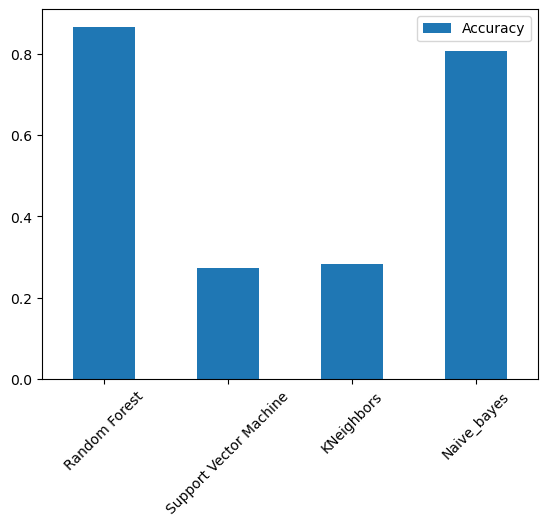

In [95]:
# compare models
model_compare = pd.DataFrame(Model_score, index=["Accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=45);

#### Random Forest is the best performing model

C:\Users\user\AppData\Local\Temp\ipykernel_17184\1705933499.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


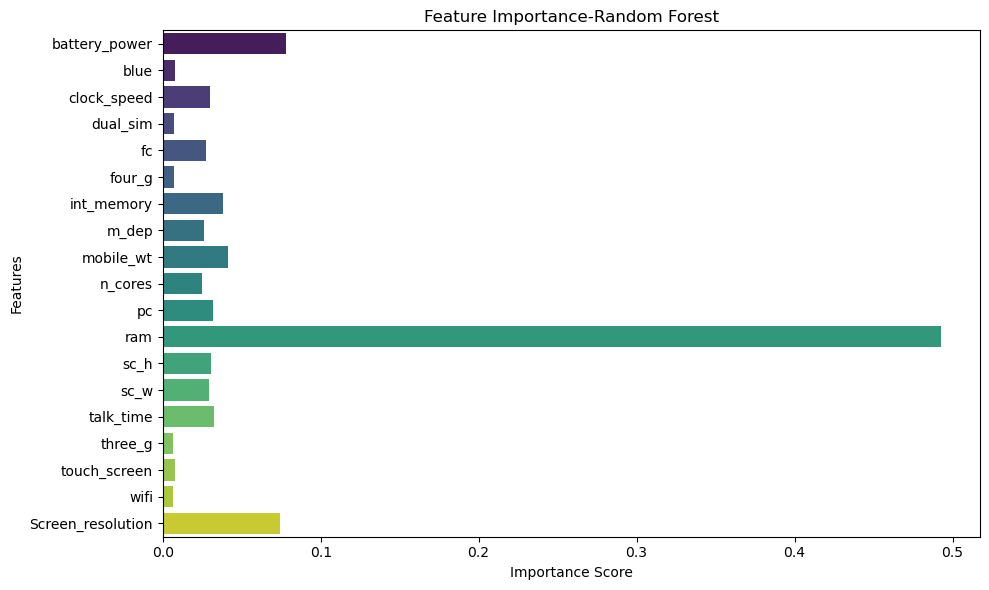

In [87]:
# Fit the model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Get feature importance
importances = model.feature_importances_
features = X_train.columns

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance-Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show();

#### Features like blue, dual sim, three G and wifi have little feature importance. We can then remove this columns

In [88]:
X_train.drop(["blue", "dual_sim", "three_g", "wifi"], axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_17184\1705933499.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


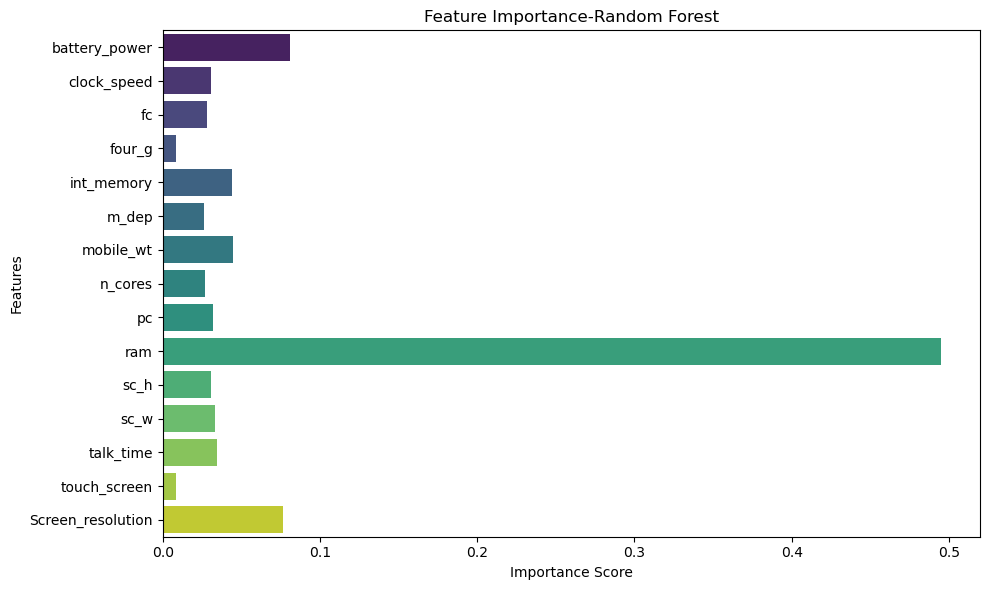

In [89]:
# Fit the model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Get feature importance
importances = model.feature_importances_
features = X_train.columns

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance-Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show();

### HyperParameter Tuning

In [96]:
from sklearn.model_selection import RandomizedSearchCV
# Using RandomizedSearchCV
Rf_grid = {"n_estimators": np.arange(100, 500, 50),
          "max_depth": [None] + list(np.arange(5, 30, 5)),
          "min_samples_split": [2, 5, 10],
          "min_samples_leaf": [1, 2, 4],
          "max_features": ["sqrt", "log2"],
          "bootstrap": [True, False]}
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=Rf_grid,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)
random_search.fit(X_train, Y_train)
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}


In [19]:
from sklearn.model_selection import GridSearchCV
# Using GridSearchCV
np.random.seed(42)
Grid = {
    "n_estimators": [100, 200, 400],
    "max_depth": [None, 20],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt"],
    "bootstrap": [False]
}
Grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=Grid,
    cv=5,
    n_jobs=-1
)
Grid_search.fit(X_train, Y_train)
print("Best Parameters from the Grid Search are: ", Grid_search.best_params_)
cros

Best Parameters from the Grid Search are:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}


In [22]:
from sklearn.model_selection import cross_val_score
# find the accuracy of the model after hyperparameter tuning
Cv_score = cross_val_score(Grid_search, X_train, Y_train, cv=5)
print(f"The score after Hyperparameter tuning is: {np.mean(Cv_score)}")

The score after Hyperparameter tuning is: 0.8714999999999999


In [168]:
# Build a pipeline
from sklearn.pipeline import Pipeline
df = pd.read_csv("train.csv")
# Feature Engineering: Create screen resolution and drop insignificant features
df["Screen_resolution"] = df["px_height"] * df["px_width"]
df.drop(["px_height", "px_width", "blue", "dual_sim", "three_g", "wifi"], axis=1)
# Set features and target
x = df.drop("price_range", axis=1)
y = df["price_range"]
# define features to be scaled
num_features = ["ram", "battery_power", "int_memory", "Screen_resolution"]
num_transformer = StandardScaler()
pipeline = Pipeline([
    ("scaler", num_transformer, num_features),
    ("model", RandomForestClassifier(n_estimators=400,
                                     min_samples_split=5,
                                     min_samples_leaf=1,
                                     max_features='sqrt',
                                     max_depth=20,
                                     bootstrap=False))
])
pipeline.fit(x, y)
# Evaluate with cross-validation
scores = cross_val_score(pipeline, x, y, cv=5)
average_score = np.mean(scores)

# output Results
print("Cross-Validation scores: ", scores)
print("Average Accuracy: ", round(average_score, 4))

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [165]:
# Make prediction on the test dataset
predictions = random_search.predict(df_test_scaled)
# Create a submission Dataframe
submission = pd.DataFrame({"id": ID,
                          "price_range": predictions
                          })
submission.to_csv("submission.csv", index=False)
print("Predictions exported succesfully")

Predictions exported succesfully


In [166]:
Final_result = pd.read_csv("submission.csv")
Final_result.head(20)

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1
5,6,3
6,7,3
7,8,1
8,9,3
9,10,0


### We have come to the end of this Project

We built a Machine Learning model that would predict the Class (Price Range) of Mobile phones. The best performing model was the RandomForestClassifierwith an Accuracy of : 87% . This model can be applied in real world business scenarios where vendors can utilize in predicting the price range of gadgets to be sold. The resulting Predictions were exported to a CSV file for submission.